In [3]:
import pandas as pd

### load train data

In [4]:
raw_train = pd.read_csv('./data/train.csv')

In [4]:
raw_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### Summary

In [5]:
raw_summary = raw_train.describe()

In [42]:
raw_summary.to_csv('./output/raw_summary.csv', encoding='utf-8')

In [6]:
a = map(lambda x:'cont'+str(x+1),range(7))
a.insert(0,'loss')
raw_summary[a]

,loss,cont1,cont2,cont3,cont4,cont5,cont6,cont7
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,3037.337686,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970
std,2904.086186,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450
min,0.670000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503
25%,1204.460000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175
50%,2115.570000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285
75%,3864.045000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045
max,121012.250000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000


In [7]:
a = map(lambda x:'cont'+str(x+8),range(7))
a.insert(0,'loss')
raw_summary[a]

,loss,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,3037.337686,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,2904.086186,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.670000,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,1204.460000,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,2115.570000,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,3864.045000,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,121012.250000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


In [2]:
import matplotlib.pyplot as plt

In [22]:
numeric_col_name = map(lambda x:'cont'+str(x+1),range(14))
raw_train_num = raw_train[numeric_col_name]
raw_train_num.to_csv('./output/raw_train_num.csv',encoding='utf-8')

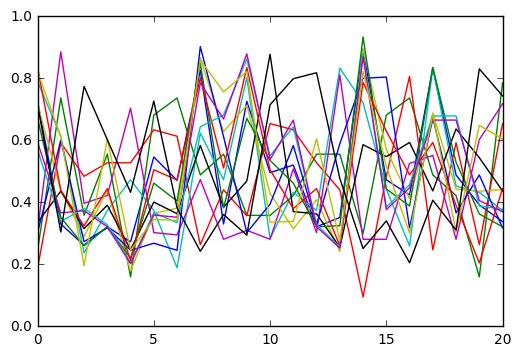

In [23]:
map(lambda i:plt.plot(raw_train_num.ix[:20,i])
    ,numeric_col_name)
plt.show()
#turn to interactive plot to explore numeric data
#give up on matplotlib...

### Normalization numeric columns

In [8]:
import math
def magnitude(v):
    return math.sqrt(sum(v[i]*v[i] for i in range(len(v))))
def normalize(v):
    vmag = magnitude(v)
    return [ v[i]/vmag  for i in range(len(v)) ]

In [9]:
raw_train_norm = raw_train

In [10]:
raw_train_norm.loss = normalize(raw_train_norm.loss)

In [11]:
a = map(lambda x:normalize(raw_train_norm[x]),numeric_col_name)

In [27]:
raw_train_norm[['cont1','cont2']].head()

,cont1,cont2
0,0.726300,0.245921
1,0.330514,0.737068
2,0.261841,0.358319
3,0.321594,0.555782
4,0.273204,0.159990


In [30]:
for i in range(14):
    raw_train_norm[numeric_col_name[i]] = a[i]
raw_train_norm[['cont1','cont2']].head()

,cont1,cont2
0,0.003168,0.001034
1,0.001442,0.003100
2,0.001142,0.001507
3,0.001403,0.002338
4,0.001192,0.000673


In [31]:
raw_train_norm.to_csv('./output/train_norm.csv', encoding='utf-8')

In [32]:
raw_summary_norm = raw_train_norm.describe()

In [41]:
raw_summary_norm.to_csv('./output/raw_summary_norm.csv', encoding='utf-8')

In [33]:
raw_summary_norm

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,1.883180e+05,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,1.883180e+05,188318.000000,188318.000000,188318.000000,1.883180e+05,188318.000000,1.883180e+05
mean,294135.982561,2.154137e-03,0.002133,0.002136,0.002117,0.002118,0.002126,0.002163,0.002132,2.158250e-03,0.002159,0.002121,0.002121,2.115828e-03,0.002102,1.665570e-03
std,169336.084867,8.184535e-04,0.000871,0.000865,0.000910,0.000908,0.000889,0.000796,0.000874,8.075446e-04,0.000806,0.000901,0.000901,9.129300e-04,0.000944,1.592500e-03
min,1.000000,6.978919e-08,0.000005,0.000011,0.000762,0.001222,0.000055,0.000310,0.001038,3.556287e-07,0.000000,0.000152,0.000156,9.782439e-07,0.000762,3.674047e-07
25%,147748.250000,1.509584e-03,0.001507,0.001442,0.001409,0.001222,0.001455,0.001562,0.001371,1.595750e-03,0.001580,0.001336,0.001340,1.354773e-03,0.001249,6.604840e-04
50%,294539.500000,2.075286e-03,0.002338,0.002260,0.001950,0.001835,0.001910,0.001954,0.001933,1.962404e-03,0.001999,0.001965,0.001988,1.559814e-03,0.001728,1.160105e-03
75%,440680.500000,2.721395e-03,0.002867,0.002715,0.002807,0.002795,0.002837,0.002636,0.002733,2.519718e-03,0.002664,0.002918,0.002906,2.960364e-03,0.003073,2.118908e-03
max,587633.000000,4.296288e-03,0.003628,0.004042,0.004108,0.004274,0.004318,0.004459,0.004297,4.424910e-03,0.004313,0.004292,0.004294,4.241177e-03,0.003583,6.635891e-02


### Summary category columns

In [36]:
cat_col_name = map(lambda x:'cat'+str(x+1),range(116))

In [62]:
raw_summary_cat = raw_train[cat_col_name].describe()

In [64]:
raw_summary_cat.to_csv('./output/raw_summary_cat2.csv',encoding='utf-8')

In [65]:
raw_summary_cat

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,...,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,...,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,...,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


In [66]:
temp = raw_train[['cat62','cat64','loss']]
temp['comparison'] = temp.cat62==temp.cat64

c:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [67]:
float((188318 - sum(temp.comparison))/188318)
# almost duplicated columns and this situation will happen a lot in this train data

0.0

In [83]:
temp = raw_summary_cat.loc[:,raw_summary_cat.loc['unique']==2]

In [84]:
temp = temp.loc[:,temp.loc['top']=='A']

In [85]:
temp

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,...,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322


In [96]:
x = pd.Series(temp.loc['freq'])
x = pd.DataFrame(map(float,x))
x.describe()

,0
count,72.000000
mean,175286.694444
std,19962.010439
min,106721.000000
25%,172029.250000
50%,183876.500000
75%,187653.000000
max,188295.000000


In [98]:
import itertools

In [101]:
x = list(itertools.combinations(cat_col_name,2))
x[:5]

[('cat1', 'cat2'),
 ('cat1', 'cat3'),
 ('cat1', 'cat4'),
 ('cat1', 'cat5'),
 ('cat1', 'cat6')]

In [174]:
temp2 = pd.DataFrame(columns=('col_base','col_vs','vs','vs_rate'))
len(x)  #6670

6670

In [175]:
for i in range(len(x)):
    y = raw_train[list(x[i])]
    y['vs'] = y.iloc[:,0]==y.iloc[:,1]
    temp2.set_value(i,'col_base', x[i][0])
    temp2.set_value(i,'col_vs', x[i][1])
    temp2.set_value(i,'vs', sum(y.vs))
    temp2.set_value(i,'vs_rate',float(temp2.vs[i]/188318.))

c:\python27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [176]:
raw_summar_cat_vs = temp2
raw_summar_cat_vs.to_csv('./output/raw_summar_cat_vs.csv',encoding='utf-8')
raw_summar_cat_vs.head()

,col_base,col_vs,vs,vs_rate
0,cat1,cat2,86921,0.461565
1,cat1,cat3,132751,0.70493
2,cat1,cat4,109311,0.58046
3,cat1,cat5,110007,0.584156
4,cat1,cat6,118961,0.631703


In [177]:
pd.Series(map(float,raw_summar_cat_vs.vs_rate)).describe()[:4]

count    6670.000000
mean        0.486159
std         0.407067
min         0.000000
dtype: float64

In [179]:
temp2 = raw_summar_cat_vs[raw_summar_cat_vs.vs_rate>0.8]
temp2.col_base.describe()

count     2451
unique      79
top       cat7
freq        69
Name: col_base, dtype: object

In [180]:
import numpy as np

In [197]:
temp3 = pd.Series(pd.Categorical(temp2.col_base, categories=np.unique(temp2.col_base)))
temp3 = temp3.value_counts()
temp3.to_csv('./output/raw_summary_cat_vs_gt80p.csv',encoding='utf-8')

In [199]:
temp3.head()

cat7     69
cat3     68
cat8     65
cat14    64
cat15    63
dtype: int64

In [200]:
temp2 = raw_summar_cat_vs[raw_summar_cat_vs.vs_rate>0.6]
temp3 = pd.Series(pd.Categorical(temp2.col_base, categories=np.unique(temp2.col_base)))
temp3 = temp3.value_counts()
temp3.to_csv('./output/raw_summary_cat_vs_gt60p.csv',encoding='utf-8')

In [201]:
temp3.head()

cat3     81
cat7     77
cat8     76
cat1     74
cat14    70
dtype: int64